Generate a scale free network with 100 nodes and calculate the hitting time distribution:

In [2]:
import os
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
np.set_printoptions(threshold=np.inf)
N = 100 #number of nodes
p = 1.5

In [3]:
# hitting time calculation function
def hitting_matrix(A_matrix):
    L = np.size(A_matrix,axis = 0)
    np.fill_diagonal(A_matrix, 0)
    D_matrix = np.zeros((L,L))
    D_inv = np.zeros((L,L))
    D_sqrt = np.zeros((L,L))
    D_sqrt_inv = np.zeros((L,L))
    for i in range(L):
        D_matrix[i,i] = np.sum(A_matrix[i])
        D_inv[i,i] = 1./D_matrix[i,i]
        D_sqrt[i,i] = np.sqrt(D_matrix[i,i])
        D_sqrt_inv[i,i] = 1./D_sqrt[i,i]
    p_matrix = np.dot(D_inv, A_matrix)
    eye_matrix = np.eye(L,L)
    eye_P = eye_matrix - p_matrix

    G_Lap = np.dot(D_sqrt,eye_P)
    G_Lap_n = np.dot(G_Lap, D_sqrt_inv)

    N_1 = np.dot(D_sqrt_inv,A_matrix)
    N_matrix = np.dot(N_1, D_sqrt_inv)
    lap_matrix = D_matrix - A_matrix
    [eig_val, eig_vec] = np.linalg.eigh(G_Lap_n)
    H = np.zeros((L,L))
    d = np.sum(D_matrix)
    for i in range(L):
        for j in range(L):
            deg_i = D_matrix[i,i]
            deg_j = D_matrix[j,j]
            for k in range(L):
                if eig_val[k] != min(eig_val):
                    t_i = (eig_vec[i,k]*eig_vec[i,k])/deg_i
                    t_j = (eig_vec[j,k]*eig_vec[j,k])/deg_j
                    t_ij = (eig_vec[i,k]*eig_vec[j,k])/np.sqrt(deg_i*deg_j)
                    H[i,j] = H[i,j] + d*(1./(eig_val[k]))*(t_j-t_ij)
    return H

In [4]:
def reshape_no_diag(input_matrix):
    L = np.size(input_matrix, axis = 0)
    H_vec = np.reshape(H, (1, L*L))
    for i in reversed(xrange(L)):
        H_vec = np.delete(H_vec, i*L+i)
    return H_vec

In [5]:
#adjacency matrix for scale free network
def SF_network(N, p):
    while True:  
        s=[]
        while len(s)<N:
            nextval = int(nx.utils.powerlaw_sequence(1,p)[0]) #100 nodes, power-law exponent 2.5
            if nextval!=0:
                s.append(nextval)
        if sum(s)%2 == 0:
            break
    G = nx.configuration_model(s)
    G=nx.Graph(G) # remove parallel edges
    G.remove_edges_from(G.selfloop_edges())
    A=nx.adjacency_matrix(G)
    return A, G

In [10]:
n_bins = 40
for i in range(1,2):
    A, G = SF_network(N, p)
    H = hitting_matrix(A)
    H_avg = H
    H_vec = reshape_no_diag(H)
    [hist_avg, bins] = np.histogram(H_vec, bins = n_bins, normed = True)

In [11]:
N_iter = 20
for m in range(2,N_iter):
    A, G = SF_network(N, p)
    H = hitting_matrix(A)
    H_avg = H_avg + H
    H_vec = reshape_no_diag(H)
    [hist, bins] = np.histogram(H_vec, bins = n_bins, normed = True)

    hist_avg = hist_avg + np.array(hist)

In [12]:
H_avg = H_avg/(N_iter-1)
hist_avg = hist_avg/(N_iter-1)

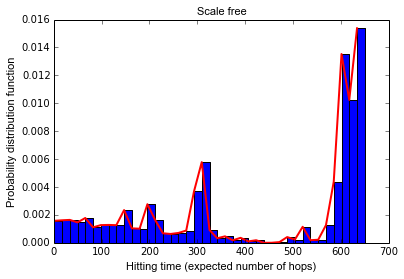

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.bar(bins[:-1],hist_avg, width=np.diff(bins), ec="k", align="edge")
ax.plot(bins[:-1], hist_avg, linewidth=2, color='r')
plt.title("Scale free", fontname="Arial", fontsize=11)
plt.xlabel("Hitting time (expected number of hops)", fontname="Arial", fontsize=11)
plt.ylabel("Probability distribution function", fontname="Arial", fontsize=11)
# plt.yticks(np.arange(0, .03,.01))
# plt.axis([0, 300, 0, .025])

plt.show()
# fig.savefig('/Users/pariarezaeinia/Desktop/draft/HitDist_SW.png', dpi=400)